Import necessary libraries

In [1]:
# Data manipulation and numerical operations
import pandas as pd
import numpy as np

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [21]:
from sklearn.model_selection import cross_val_score, learning_curve
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

In [17]:
# ML Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

In [6]:
df=pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [15]:
df.shape

(1025, 14)

In [11]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [16]:
df['target'].value_counts()

,count
target,
1,526
0,499


In [7]:
X= df.drop("target", axis=1)
y=df["target"]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

In [20]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Naive Bayes": GaussianNB()
}

accuracy_scores = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[name] = accuracy

# Show results
print("\nModel Performance on Test Set:")
for model_name, acc in sorted(accuracy_scores.items(), key=lambda x: x[1], reverse=True):
    print(f"{model_name}: {acc:.4f}")


Model Performance on Test Set:
Decision Tree: 1.0000
Random Forest: 0.9854
Gradient Boosting: 0.9707
Logistic Regression: 0.8683
Naive Bayes: 0.8683
K-Nearest Neighbors: 0.7415
Support Vector Machine: 0.7317


In [22]:
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    print(f"\n📌 {model_name} - Classification Report")
    print(classification_report(y_test, y_pred))

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


In [23]:
def cross_val(model, X, y, model_name):
    scores = cross_val_score(model, X, y, cv=10)
    print(f"\n🔁 {model_name} - Cross-validation Accuracy: {scores.mean():.4f} ± {scores.std():.4f}")


In [24]:
def plot_roc_curve(model, X_test, y_test, model_name):
    y_probs = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_probs)
    fpr, tpr, _ = roc_curve(y_test, y_probs)

    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} - ROC Curve')
    plt.legend()
    plt.show()


In [25]:
def plot_learning_curve(model, X, y, model_name):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5,
                                                             train_sizes=np.linspace(0.1, 1.0, 5),
                                                             scoring='accuracy')
    train_mean = train_scores.mean(axis=1)
    test_mean = test_scores.mean(axis=1)

    plt.plot(train_sizes, train_mean, 'o-', label='Training Accuracy')
    plt.plot(train_sizes, test_mean, 'o-', label='Validation Accuracy')
    plt.title(f'{model_name} - Learning Curve')
    plt.xlabel('Training Size')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()
    plt.show()



📌 Decision Tree - Classification Report
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        90
           1       0.97      1.00      0.99       115

    accuracy                           0.99       205
   macro avg       0.99      0.98      0.99       205
weighted avg       0.99      0.99      0.99       205



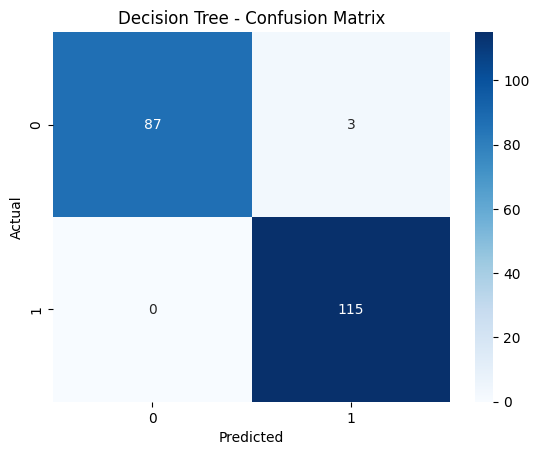


🔁 Decision Tree - Cross-validation Accuracy: 0.9971 ± 0.0087


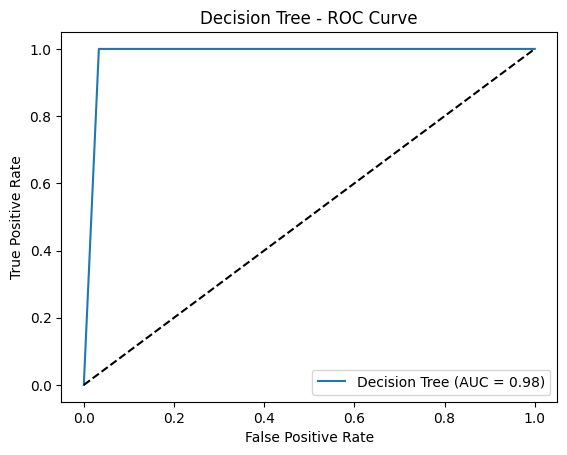

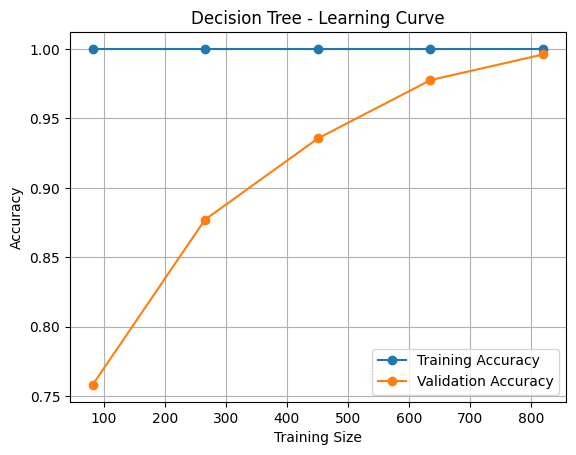


📌 Random Forest - Classification Report
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        90
           1       1.00      0.97      0.99       115

    accuracy                           0.99       205
   macro avg       0.98      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



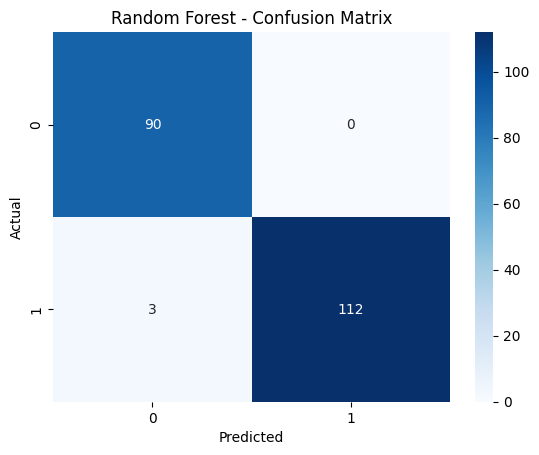


🔁 Random Forest - Cross-validation Accuracy: 0.9971 ± 0.0088


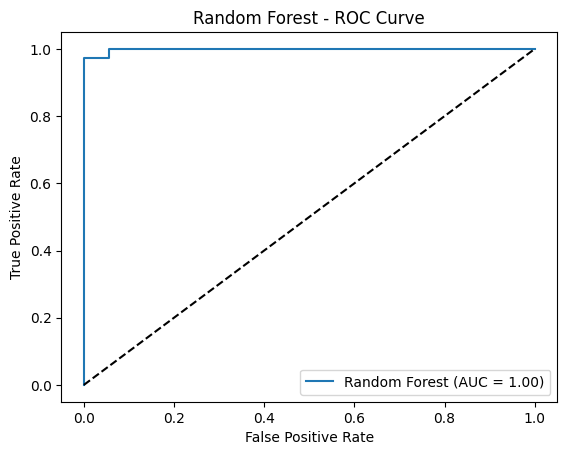

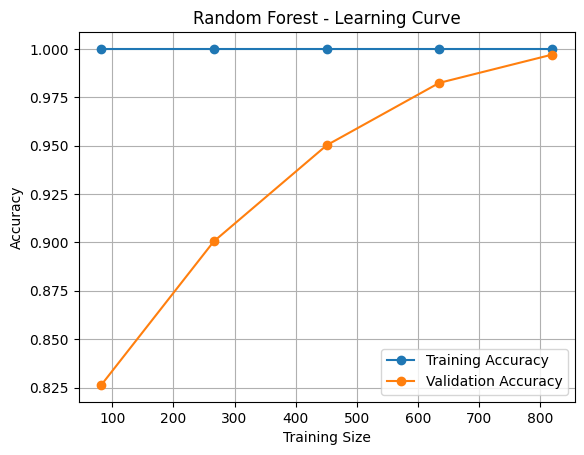


📌 Gradient Boosting - Classification Report
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        90
           1       0.98      0.97      0.97       115

    accuracy                           0.97       205
   macro avg       0.97      0.97      0.97       205
weighted avg       0.97      0.97      0.97       205



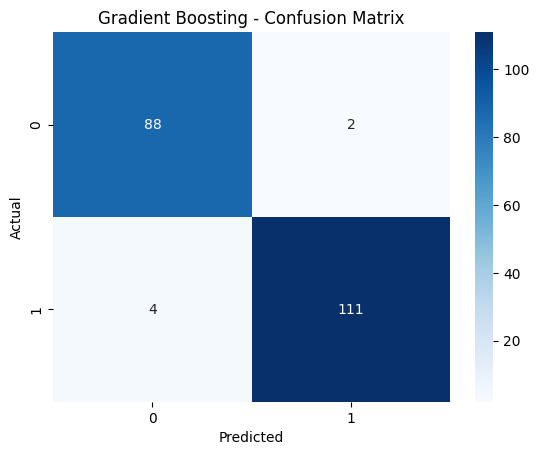


🔁 Gradient Boosting - Cross-validation Accuracy: 0.9707 ± 0.0185


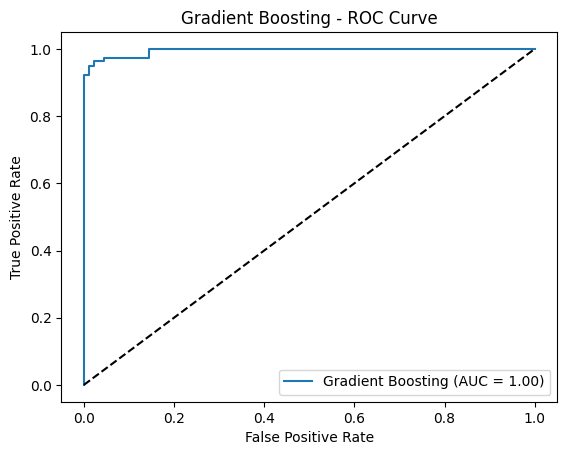

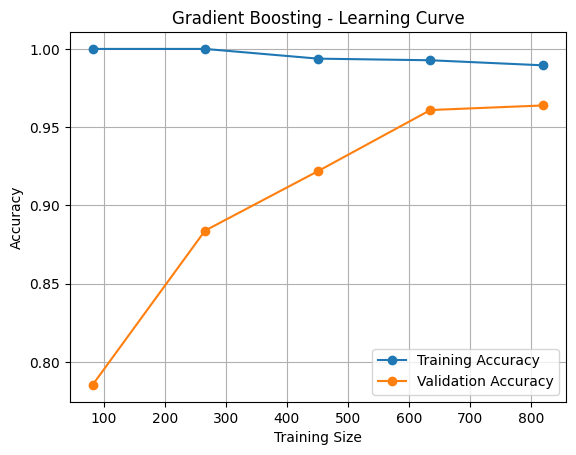

In [27]:
top_models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

for name, model in top_models.items():
    model.fit(X_train, y_train)

    evaluate_model(model, X_test, y_test, name)
    cross_val(model, X, y, name)
    plot_roc_curve(model, X_test, y_test, name)
    plot_learning_curve(model, X, y, name)


In [28]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)



📌 Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        90
           1       1.00      0.97      0.99       115

    accuracy                           0.99       205
   macro avg       0.98      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



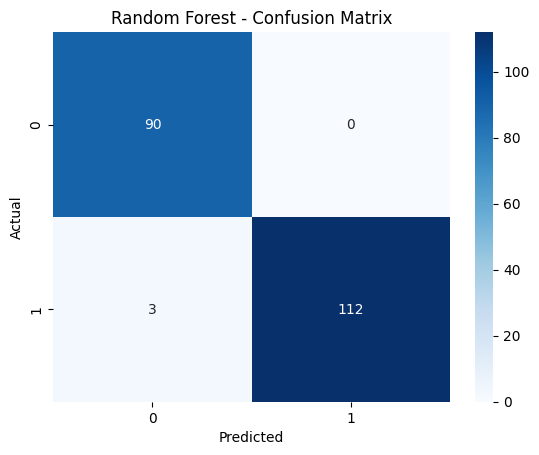

In [29]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
print("\n📌 Classification Report for Random Forest:")
print(classification_report(y_test, y_pred))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [30]:
import joblib
joblib.dump(rf_model, "heart_disease_rf_model.pkl")
print("✅ Model saved as heart_disease_rf_model.pkl")


✅ Model saved as heart_disease_rf_model.pkl
